# 8.2. Predicting who will survive on the Titanic with logistic regression

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('https://github.com/ipython-books'
                    '/cookbook-2nd-data/blob/master/'
                    'titanic_train.csv?raw=true')
test = pd.read_csv('https://github.com/ipython-books/'
                   'cookbook-2nd-data/blob/master/'
                   'titanic_test.csv?raw=true')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.columns[[2, 4, 5, 1]]

Index(['Pclass', 'Sex', 'Age', 'Survived'], dtype='object')

In [8]:
train[train.columns[[2, 4, 5, 1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [9]:
data = train[['Age', 'Pclass', 'Survived']]
# Add a 'Female' column.
data = data.assign(Female=train['Sex'] == 'female')
# Reorder the columns.
data = data[['Female', 'Age', 'Pclass', 'Survived']]
data = data.dropna()
data.head()

,Female,Age,Pclass,Survived
0,False,22.0,3,0
1,True,38.0,1,1
2,True,26.0,3,1
3,True,35.0,1,1
4,False,35.0,3,0


In [22]:
data_np = data.astype(np.int32).values
X = data_np[:, :-1]
y = data_np[:, -1]

[[ 0 22  3]
 [ 1 38  1]
 [ 1 26  3]
 ...
 [ 1 19  1]
 [ 0 26  1]
 [ 0 32  3]]
[0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 1 0

In [23]:
# We define a few boolean vectors.
# The first column is 'Female'.
female = X[:, 0] == 1

# The last column is 'Survived'.
survived = y == 1

# This vector contains the age of the passengers.
age = X[:, 1]

# We compute a few histograms.
bins_ = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female],
                          bins=bins_)[0],
     'female': np.histogram(age[survived & female],
                            bins=bins_)[0]}
D = {'male': np.histogram(age[~survived & ~female],
                          bins=bins_)[0],
     'female': np.histogram(age[~survived & female],
                            bins=bins_)[0]}

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80]


[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75]


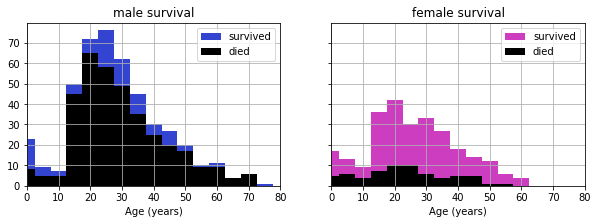

In [25]:
# We now plot the data.
bins = bins_[:-1]
fig, axes = plt.subplots(1, 2, figsize=(10, 3),
                         sharey=True)
for ax, sex, color in zip(axes, ('male', 'female'),
                          ('#3345d0', '#cc3dc0')):
    ax.bar(bins, S[sex], bottom=D[sex], color=color,
           width=5, label='survived')
    ax.bar(bins, D[sex], color='k',
           width=5, label='died')
    ax.set_xlim(0, 80)
    ax.set_xlabel("Age (years)")
    ax.set_title(sex + " survival")
    ax.grid(None)
    ax.legend()

In [26]:
# We split X and y into train and test datasets.
(X_train, X_test, y_train, y_test) = \
    ms.train_test_split(X, y, test_size=.05)

In [27]:
# We instanciate the classifier.
logreg = lm.LogisticRegression()

In [31]:
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'Actual and predicted survival outcomes on the test set')

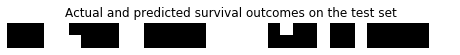

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.imshow(np.vstack((y_test, y_predicted)),
          interpolation='none', cmap='bone')
ax.set_axis_off()
ax.set_title("Actual and predicted survival outcomes "
             "on the test set")

In [36]:
ms.cross_val_score(logreg, X, y)

/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.78661088, 0.78991597, 0.78059072])

In [37]:
grid = ms.GridSearchCV(
    logreg, {'C': np.logspace(-5, 5, 200)}, n_jobs=4)
grid.fit(X_train, y_train)
grid.best_params_

/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 0.036969127071950283}

In [35]:
ms.cross_val_score(grid.best_estimator_, X, y)

/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yihanc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.77405858, 0.81092437, 0.79324895])